In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv("Placement.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# 1)Replace the NaN values with correct value. And justify why you have chosen the same

In [4]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
dataset.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [6]:
dataset["salary"].fillna(0,inplace=True)

In [7]:
dataset.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

# 2)How many of them are not placed? 

In [8]:
dataset['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

# 3)Find the reason for non placement from the dataset? 

In [9]:
mean_values = dataset.groupby("status").mean(numeric_only=True)

print(mean_values)

                 sl_no      ssc_p      hsc_p   degree_p    etest_p      mba_p  \
status                                                                          
Not Placed  110.477612  57.544030  58.395522  61.134179  69.587910  61.612836   
Placed      106.878378  71.721486  69.926554  68.740541  73.238041  62.579392   

                   salary  
status                     
Not Placed       0.000000  
Placed      288655.405405  


# 4)What kind of relation between salary and mba_p

In [10]:
quan=[]
qual=[]
for columnName in dataset.columns:
    #print(columnName)
    if(dataset[columnName].dtype=='O'):
        #print("qual")
        qual.append(columnName)
    else:
        #print("quan")
        quan.append(columnName)

In [11]:
dataset[quan].corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


# Correlation between salary and mba_p  = 0.139823 (Postive correalation)

# 5)Which specialization is getting minimum salary? 

In [12]:
placed_df = dataset[dataset['status'] == 'Placed']

In [13]:
placed_df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [14]:
# Group by specialisation and calculate average salary
specialisation_salary = placed_df.groupby('specialisation')['salary'].mean().sort_values()

In [15]:
# Display the specialization with the lowest average salary
print("Specialization-wise average salaries:\n", specialisation_salary)
print("\nLowest average salary specialization:", specialisation_salary.min())

Specialization-wise average salaries:
 specialisation
Mkt&HR     270377.358491
Mkt&Fin    298852.631579
Name: salary, dtype: float64

Lowest average salary specialization: 270377.358490566


# 6)How many of them getting above 500000 salary? 

In [16]:
# Filter students with salary above 500000
high_salary_count = dataset[dataset['salary'] > 500000].shape[0]
print("Number of students with salary above 500000:", high_salary_count)

Number of students with salary above 500000: 3


# 7)Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing) 

In [17]:
import scipy.stats as stats

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(dataset['etest_p'],dataset['mba_p'])

print("F-Statistic:", f_stat)
print("P-Value:", p_value)

F-Statistic: 98.64487057324706
P-Value: 4.672547689133573e-21


In [18]:
# Null Hypothesis (H₀): There is no significant difference between the of etest_p and mba_p.
# Alternative Hypothesis (H₁): There is a significant difference between the of etest_p and mba_p.

# here p_value > 0.05, so fails to reject H₀ and therefore "There is a no significant difference between the of etest_p and mba_p"

# 8)Test the similarity between the degree_t(Sci&Tech) and specialisa tion(Mkt&HR) with respect to salary at significance level of 5%.(Make decision using Hypothesis Testing) 

In [19]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()

# Group 1: degree_t = Sci&Tech
sci_tech_salary = dataset[dataset['degree_t'] == 'Sci&Tech']['salary']
# Group 2: specialisation = Mkt&HR
mkt_hr_salary = dataset[dataset['specialisation'] == 'Mkt&HR']['salary']

t_stat, p_value = ttest_ind(sci_tech_salary, mkt_hr_salary)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: 2.692041243555374
P-Value: 0.007897969943471179


In [20]:
# Null Hypothesis (H₀): There is no significant difference in salary between Students with degree_t = Sci&Tech and Students with specialisation = Mkt&HR.
#Alternative Hypothesis (H₁): There is a significant difference in salary between the two groups.

# here p_value < 0.05, so reject H₀ and therefore there is a significant difference in salary between the two groups.

# 9)Convert the normal distribution to standard normal distribution for salary column 

In [23]:
import seaborn as sns
def stdNBgraph(dataset):
    #converted to std Norm Dist
    mean=dataset.mean()
    std=dataset.std()
    
    values=[i for i in dataset]
    
    z_score=[((j-mean)/std)for j in values]
    
    sns.distplot(z_score,kde=True)
    sum(z_score)/len(z_score)
    
    


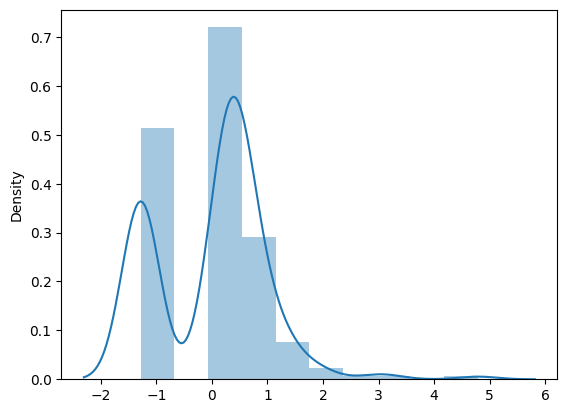

In [24]:
stdNBgraph(dataset["salary"])

# 10)What is the probability Density Function of the salary range from 700000 to 900000?

<Axes: xlabel='salary', ylabel='Density'>

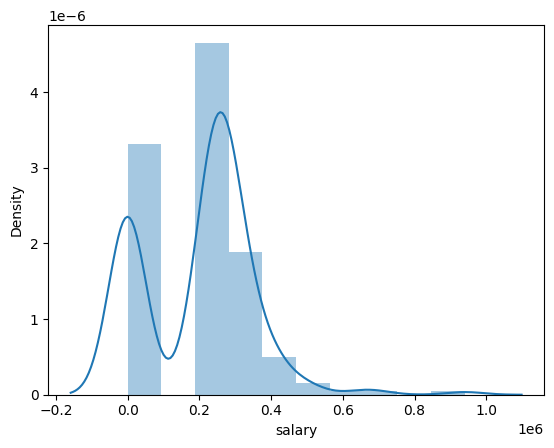

In [25]:
import seaborn as sns
sns.distplot(dataset["salary"])

In [26]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    #generate a sample
    sample=dataset
    #Calculate parameters
    sample_mean= sample.mean()
    sample_std= sample.std()
    print('Mean=%.3f,Standard Deviation=%.3f'% (sample_mean,sample_std))
    # define the distribution
    dist=norm(sample_mean,sample_std)

    #sample probabilities for a range of outcomes
    values=[value for value in range (startrange,endrange)]
    probabilities =[dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("The area between range ({},{}):{} " .format(startrange,endrange,sum(probabilities))) 
    return prob
    

Mean=198702.326,Standard Deviation=154780.927
The area between range (700000,900000):0.0005973310593974868 


np.float64(0.0005973310593974868)

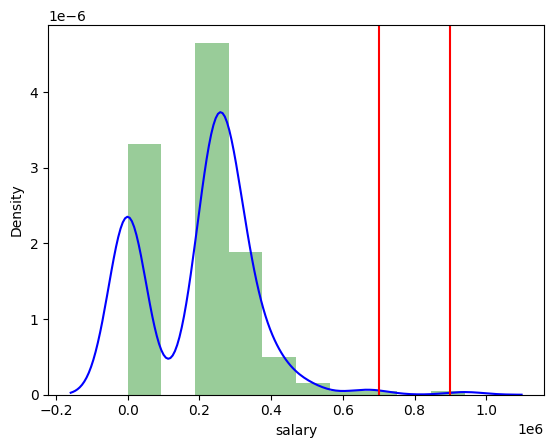

In [27]:
get_pdf_probability(dataset["salary"],700000,900000) 

# 11)Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)

In [28]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()

#Same group with different condition ('etest_p', 'mba_p)
degree_t=dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
degree_t1=dataset[dataset['degree_t']=='Sci&Tech']['mba_p']

t_stat, p_value = ttest_rel(degree_t,degree_t1)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: 5.0049844583693615
P-Value: 5.517920600505392e-06


In [29]:
# Null Hypothesis (H₀): There is no significant difference between etest_p and mba_p for the students with degree_t(Sci&Tech) 
# Alterative Hypothesis (H₁): There is a significant difference between etest_p and mba_p for the students with degree_t(Sci&Tech) 

# here p_value > 0.05, so fails to reject H₀ and There is no significant difference between etest_p and mba_p for the students with degree_t(Sci&Tech) are statistically similar at the 5% significance level.

# 12)Which parameter is highly correlated with salary?

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [37]:
calc_vif(dataset[[ "etest_p", "salary"]])

,variables,VIF
0,etest_p,2.745261
1,salary,2.745261


# 13) plot any useful graph and explain it

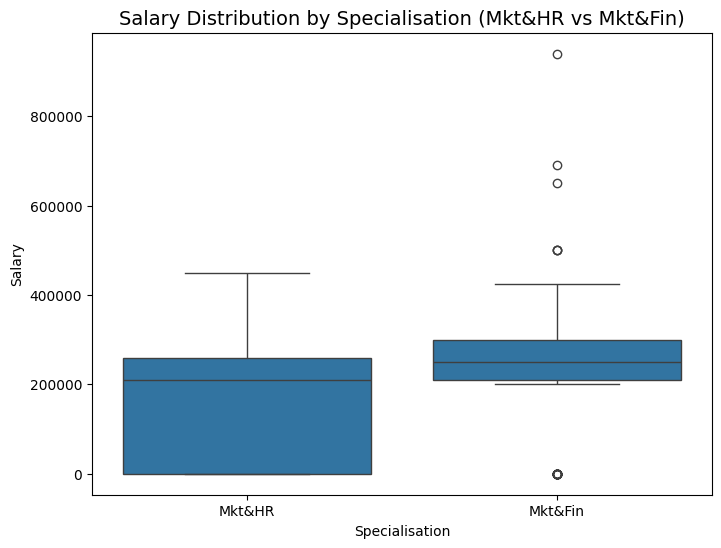

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplot: Salary vs Specialization
plt.figure(figsize=(8,6))
sns.boxplot(x='specialisation', y='salary', data=dataset)
plt.title("Salary Distribution by Specialisation (Mkt&HR vs Mkt&Fin)", fontsize=14)
plt.xlabel("Specialisation")
plt.ylabel("Salary")
plt.show()